In [1]:
# import logging
# import os
# import json
# import time
# import glob
# import h5py
# import numpy as np
# import datetime as dt
# import re
# import faiss

# from annoy import AnnoyIndex
# from keras import optimizers
# from keras.layers import Dense, BatchNormalization, Activation, Dropout
# from keras.losses import cosine_proximity
# from keras.preprocessing import image
# from keras.models import Model
import faiss
from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input
# import keras.backend as K
# from operator import itemgetter

# import matplotlib.pyplot as plt

# logger = logging.getLogger()
# logger.setLevel(logging.INFO)

from utils import get_image_paths
from gram_matrices import gram_matrix, build_gram_lib, gen_images_embeddings, calc_layer_sum_sq, get_concatenated_images, query_gram_lib, plot_results, save_gram_lib, load_gram_lib

ModuleNotFoundError: No module named 'faiss'

In [4]:
model = VGG16(weights='imagenet', include_top=True)

In [5]:
image_paths = get_image_paths('../data/test')

keeping 14 image_paths to analyze


In [8]:
images_embeddings, layer_list, file_mapping = gen_images_embeddings(image_paths, model)

ImportError: Could not import PIL.Image. The use of `array_to_img` requires PIL.

In [15]:
def _index_grams(gram_list_list, index_dict, layer_list):
    for i, gram_list in enumerate(gram_list_list):
        gram_stack = np.stack(gram_list)
        index_dict[layer_list[i]].add(gram_stack)
        gram_list_list = [[] for _ in range(len(gram_list_list))]

In [18]:
lib_name = 'test_1'

# create library
index_dict = {}
gram_list_list = [[] for _ in range(len(layer_list))]
for i, img_embeddings in enumerate(images_embeddings):
    
    for k, emb in enumerate(img_embeddings):
        gram = gram_matrix(emb)
        gram_flat = gram.flatten()
        gram_list_list[k].append(gram_flat)
    
        if i == 0:
            d = len(gram_flat)
            index_dict[f'{layer_names[k]}'] = faiss.IndexFlatL2(d)
    
    if i % 100:
        index_grams(gram_list_list, index_dict, layer_list)
    
if gram_list_list:
    index_grams(gram_list_list, index_dict, layer_list)
    

#orig_gram_lib = build_gram_lib(images_embeddings, layer_list)

NameError: name 'faiss' is not defined

In [ ]:
query_idx = 0
k = 4

query_gram_dict = {layer_name: index_dict[query_idx] for layer_name, gram_stack in index_dict.items()}

# query
for layer_name, gram in query_gram_dict:
    D, I = index.search(gram, k)
    

In [28]:
# load_gram_lib
start = dt.datetime.now()
file_index, gram_lib = load_gram_lib(lib_name)
for k, gram_stack in gram_lib.items():
    print(gram_stack.shape)

(14, 64, 64)
(14, 64, 64)
(14, 64, 64)
(14, 128, 128)
(14, 128, 128)
(14, 128, 128)
(14, 256, 256)
(14, 256, 256)
(14, 256, 256)
(14, 256, 256)
(14, 512, 512)
(14, 512, 512)
(14, 512, 512)
(14, 512, 512)
(14, 512, 512)
(14, 512, 512)
(14, 512, 512)
(14, 512, 512)


In [39]:
query_gram_dict = {layer_name: gram_stack[query_idx, :] for layer_name, gram_stack in gram_lib.items()}
layer_indices = [5]
layer_names = [layer_list[idx] for idx in layer_indices]
n_results = 3

start = dt.datetime.now()
results_indices = query_gram_lib(query_gram_dict, gram_lib, layer_names)
end = dt.datetime.now()
t_per_image = (end - start).microseconds / len(image_paths) / 1000
print(t_per_image)

11.130214285714287


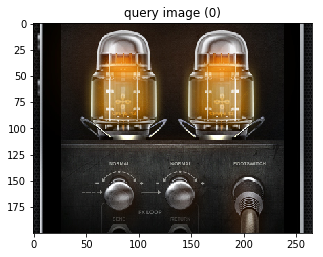

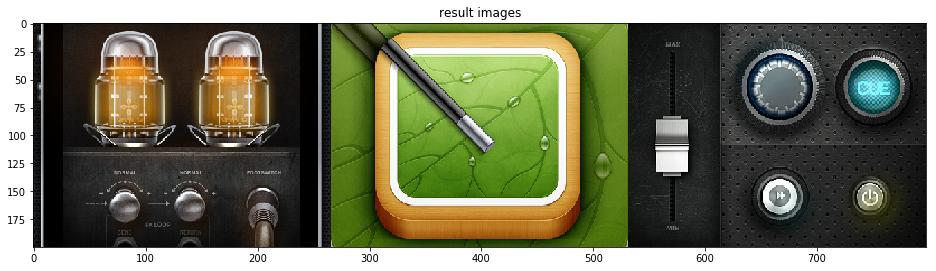

In [35]:
plot_results(query_idx, results_indices, file_index)